In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [2]:
data = pd.read_csv('/kaggle/input/african-development-bank/finance1.csv', encoding='latin-1')

In [3]:
data.head()

,Project Code,Title,Commitment in U.A,Country,Starting Date,Status,Source of Financing,Sector,Sovereign
0,P-MG-H00-002,Madagascar - Industrialisation and Financial S...,"12,080,000.00",Madagascar,28 Oct 2020,Approved,African Development Fund,Finance,Sovereign
1,P-Z1-H00-063,Multinational - Domestic debt markets developm...,"1,500,000.00",Multinational,13 Oct 2020,Implementation,Fragile States Facility,Finance,Sovereign
2,P-MG-HAZ-001,Madagascar - SME Business Linkages Program,"1,000,000.00",Madagascar,15 May 2020,Implementation,Fragile States Facility,Finance,Sovereign
3,P-MU-H00-004,Mauritius - Stock Exchange Mauritius (SEM) Pro...,"430,000.00",Mauritius,27 Apr 2020,Implementation,Middle Income Countries Fund,Finance,Sovereign
4,P-AO-HAB-009,Angola - Line of Credit to « Banco Millennium ...,"23,415,605.04",Angola,15 Apr 2020,Approved,African Development Bank,Finance,Non Sovereign


In [4]:
data.shape

(355, 9)

In [5]:
data.duplicated().sum()

17

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Project Code         337 non-null    object
 1   Title                336 non-null    object
 2   Commitment in U.A    336 non-null    object
 3   Country              336 non-null    object
 4   Starting Date        336 non-null    object
 5   Status               336 non-null    object
 6   Source of Financing  336 non-null    object
 7   Sector               336 non-null    object
 8   Sovereign            281 non-null    object
dtypes: object(9)
memory usage: 25.1+ KB


In [7]:
df = data.dropna()

In [8]:
df.duplicated().sum()

0

In [9]:
df['Starting Date'] = pd.to_datetime(df['Starting Date'])

/tmp/ipykernel_18/3688471821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Starting Date'] = pd.to_datetime(df['Starting Date'])


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 0 to 351
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Project Code         280 non-null    object        
 1   Title                280 non-null    object        
 2   Commitment in U.A    280 non-null    object        
 3   Country              280 non-null    object        
 4   Starting Date        280 non-null    datetime64[ns]
 5   Status               280 non-null    object        
 6   Source of Financing  280 non-null    object        
 7   Sector               280 non-null    object        
 8   Sovereign            280 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 21.9+ KB


In [11]:
df['starting_year'] = df['Starting Date'].dt.year

/tmp/ipykernel_18/1448124580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['starting_year'] = df['Starting Date'].dt.year


In [12]:
df.head()

,Project Code,Title,Commitment in U.A,Country,Starting Date,Status,Source of Financing,Sector,Sovereign,starting_year
0,P-MG-H00-002,Madagascar - Industrialisation and Financial S...,"12,080,000.00",Madagascar,2020-10-28,Approved,African Development Fund,Finance,Sovereign,2020
1,P-Z1-H00-063,Multinational - Domestic debt markets developm...,"1,500,000.00",Multinational,2020-10-13,Implementation,Fragile States Facility,Finance,Sovereign,2020
2,P-MG-HAZ-001,Madagascar - SME Business Linkages Program,"1,000,000.00",Madagascar,2020-05-15,Implementation,Fragile States Facility,Finance,Sovereign,2020
3,P-MU-H00-004,Mauritius - Stock Exchange Mauritius (SEM) Pro...,"430,000.00",Mauritius,2020-04-27,Implementation,Middle Income Countries Fund,Finance,Sovereign,2020
4,P-AO-HAB-009,Angola - Line of Credit to « Banco Millennium ...,"23,415,605.04",Angola,2020-04-15,Approved,African Development Bank,Finance,Non Sovereign,2020


In [13]:
df2 = df[ df['starting_year'] == 2019 ]
df2.head()

,Project Code,Title,Commitment in U.A,Country,Starting Date,Status,Source of Financing,Sector,Sovereign,starting_year
10,P-ML-HZ0-001,Mali - African Trade Insurance Agency (ATI): C...,"7,290,000.00",Mali,2019-12-05,Approved,African Development Fund,Finance,Sovereign,2019
11,P-KE-HAB-030,Kenya - Equity Group Holdings Plc,"73,173,765.74",Kenya,2019-11-28,Approved,African Development Bank,Finance,Non Sovereign,2019
12,P-MA-HAA-012,"Morocco - ""Fonds dEquipement Communal (FEC)""","79,781,717.22",Morocco,2019-11-28,Approved,African Development Bank,Finance,Non Sovereign,2019
13,P-Z1-HB0-064,Multinational  Project for Digitisation of Go...,"1,258,000.00",Multinational,2019-11-25,Implementation,Fragile States Facility,Finance,Sovereign,2019
14,P-Z1-HB0-071,SIERRA LEONE - Government Payments Digitizatio...,"279,000.00",Multinational,2019-11-25,Approved,Fragile States Facility,Finance,Sovereign,2019


In [14]:
df2 = df2.drop(['Project Code', 'Title', 'Starting Date', 'Status', 'Source of Financing', 'Sector', 'Sovereign'], axis=1)

In [15]:
df2.head()

,Commitment in U.A,Country,starting_year
10,"7,290,000.00",Mali,2019
11,"73,173,765.74",Kenya,2019
12,"79,781,717.22",Morocco,2019
13,"1,258,000.00",Multinational,2019
14,"279,000.00",Multinational,2019


In [16]:
df2['Commitment in U.A'] = df2['Commitment in U.A'].str.replace(r',','')

In [17]:
df2['Commitment in U.A'] = df2['Commitment in U.A'].apply(pd.to_numeric)

In [18]:
df2['Country'].value_counts().reset_index()

,Country,count
0,Multinational,10
1,Tunisia,4
2,Kenya,3
3,Mali,1
4,Morocco,1
5,Guinea,1
6,Senegal,1
7,Rwanda,1
8,Mozambique,1
9,Madagascar,1


<Axes: xlabel='Country', ylabel='Commitment in U.A'>

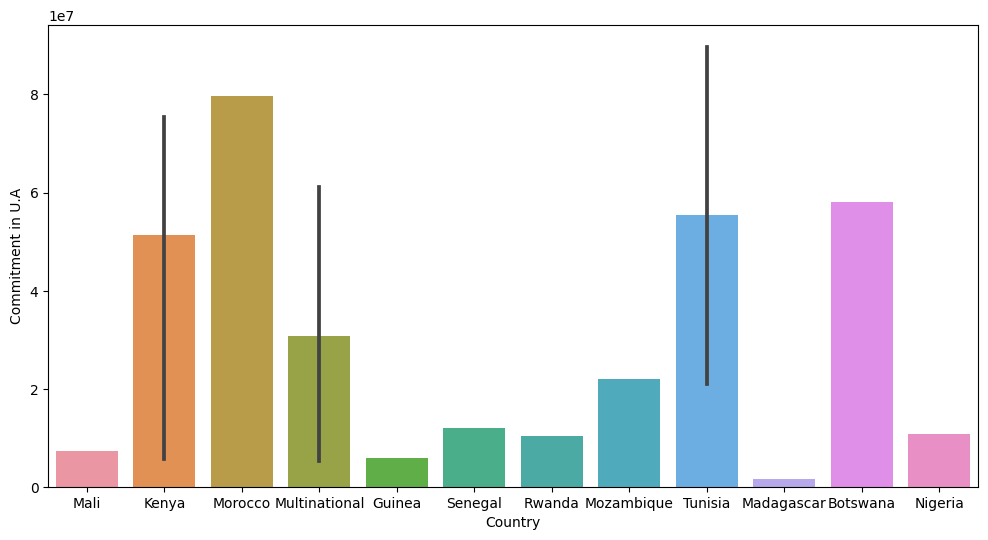

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Commitment in U.A', data=df2)